# Data Science Fundamentals Final Project: Reliability of MBTA Rapid Transit Train Lines
### Are Trains More or Less Reliable Than We Think

By Angel LaVoie

Data Set Chosen: https://mbta-massdot.opendata.arcgis.com/datasets/MassDOT::mbta-bus-commuter-rail-rapid-transit-reliability/about

Contextual Inspiration: http://mbtaviz.github.io/ and Repo Source: https://github.com/mbtaviz/mbtaviz.github.io/

In [ ]:
NAME = "Angel LaVoie"

In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
path="C:\\Users\\lavoiet2\\OneDrive - Wentworth Institute of Technology\\Documents\\Fall 2021 Semester\\Data Science\\Final Project\\MBTA_Bus,_Commuter_Rail,_&_Rapid_Transit_Reliability.csv"

## Introduction

Today we will be using data provided from the Massachusetts Bay Transportation Authority (MBTA) to determine the reliability of it's Rapid Transit service, also known as the T (specifically the in-city Train System)

## Cleaning up the Data

The data acquired contains information on all portions of the MBTA but we are only interested in the Rapid Transit service data

In [44]:
df=pd.read_csv(path)
df.head(5)

,service_date,gtfs_route_id,gtfs_route_short_name,gtfs_route_long_name,gtfs_route_desc,route_category,mode_type,peak_offpeak_ind,metric_type,otp_numerator,otp_denominator,cancelled_numerator,ObjectId
0,2021/07/31 04:00:00+00,Red,NaN,NaN,Rapid Transit,Red Line,Rail,OFF_PEAK,Passenger Wait Time,87827.129990,95790.18606,0,1
1,2021/07/31 04:00:00+00,Orange,NaN,NaN,Rapid Transit,Orange Line,Rail,OFF_PEAK,Passenger Wait Time,65277.856830,69300.21615,0,2
2,2021/07/31 04:00:00+00,Green-E,NaN,NaN,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,19592.385870,24275.08594,0,3
3,2021/07/31 04:00:00+00,Green-D,NaN,NaN,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,9584.485722,11815.79582,0,4
4,2021/07/31 04:00:00+00,Green-C,NaN,NaN,Rapid Transit,Green Line,Rail,OFF_PEAK,Passenger Wait Time,21425.151210,26716.66834,0,5


In [45]:
to_drop=[
    "gtfs_route_short_name",
    "gtfs_route_long_name",
    "route_category",
    "mode_type",
    "cancelled_numerator",
    "ObjectId"
]
df.drop(to_drop, inplace=True, axis=1)
df.head(10)

,service_date,gtfs_route_id,gtfs_route_desc,peak_offpeak_ind,metric_type,otp_numerator,otp_denominator
0,2021/07/31 04:00:00+00,Red,Rapid Transit,OFF_PEAK,Passenger Wait Time,87827.129990,95790.186060
1,2021/07/31 04:00:00+00,Orange,Rapid Transit,OFF_PEAK,Passenger Wait Time,65277.856830,69300.216150
2,2021/07/31 04:00:00+00,Green-E,Rapid Transit,OFF_PEAK,Passenger Wait Time,19592.385870,24275.085940
3,2021/07/31 04:00:00+00,Green-D,Rapid Transit,OFF_PEAK,Passenger Wait Time,9584.485722,11815.795820
4,2021/07/31 04:00:00+00,Green-C,Rapid Transit,OFF_PEAK,Passenger Wait Time,21425.151210,26716.668340
5,2021/07/31 04:00:00+00,Green-B,Rapid Transit,OFF_PEAK,Passenger Wait Time,1472.018734,1820.166904
6,2021/07/31 04:00:00+00,CR-Worcester,Commuter Rail,OFF_PEAK,Headway / Schedule Adherence,18.000000,20.000000
7,2021/07/31 04:00:00+00,CR-Worcester,Commuter Rail,PEAK,Headway / Schedule Adherence,0.000000,0.000000
8,2021/07/31 04:00:00+00,CR-Shuttle003,Rail Replacement Bus,PEAK,Headway / Schedule Adherence,0.000000,0.000000
9,2021/07/31 04:00:00+00,CR-Shuttle003,Rail Replacement Bus,OFF_PEAK,Headway / Schedule Adherence,18.000000,18.000000


In [46]:
route_type=df["gtfs_route_desc"]
df.drop(df[route_type != "Rapid Transit"].index, inplace=True)
peak_ind=df["peak_offpeak_ind"]
df.drop(df[peak_ind != "OFF_PEAK"].index, inplace=True)
df.head(10)

,service_date,gtfs_route_id,gtfs_route_desc,peak_offpeak_ind,metric_type,otp_numerator,otp_denominator
0,2021/07/31 04:00:00+00,Red,Rapid Transit,OFF_PEAK,Passenger Wait Time,87827.129990,95790.186060
1,2021/07/31 04:00:00+00,Orange,Rapid Transit,OFF_PEAK,Passenger Wait Time,65277.856830,69300.216150
2,2021/07/31 04:00:00+00,Green-E,Rapid Transit,OFF_PEAK,Passenger Wait Time,19592.385870,24275.085940
3,2021/07/31 04:00:00+00,Green-D,Rapid Transit,OFF_PEAK,Passenger Wait Time,9584.485722,11815.795820
4,2021/07/31 04:00:00+00,Green-C,Rapid Transit,OFF_PEAK,Passenger Wait Time,21425.151210,26716.668340
5,2021/07/31 04:00:00+00,Green-B,Rapid Transit,OFF_PEAK,Passenger Wait Time,1472.018734,1820.166904
37,2021/07/31 04:00:00+00,Blue,Rapid Transit,OFF_PEAK,Passenger Wait Time,43020.673870,44438.118830
161,2021/07/30 04:00:00+00,Blue,Rapid Transit,OFF_PEAK,Passenger Wait Time,41619.866310,43350.529170
203,2021/07/30 04:00:00+00,751,Rapid Transit,OFF_PEAK,Headway / Schedule Adherence,605.000000,705.000000
207,2021/07/31 04:00:00+00,751,Rapid Transit,OFF_PEAK,Headway / Schedule Adherence,508.000000,645.000000


## Working Out Results

Now that we have ironed out the data into only information that is useful to us we can get to some sort of result of calculation from the data given to us.

Within the Dataset we are given the values of "otp_numerator" and "otp_denominator" in order to determine a reliability metric for each "gfts_route_id" and "metric_type". From this we can then visualize these calculated metrics and see the organized answer to our question.

*"The number of observations or affected passengers for which thresholds for on-time performance were met. Dividing otp_numerator by otp_denominator will give the Reliability metric for the given route and service day."* - From MBTA Source Dataset Name Descriptions

In [47]:
to_drop=["gtfs_route_desc", "peak_offpeak_ind"]
df.drop(to_drop, inplace=True, axis=1)
df["otp_reliability_metric"]=df["otp_numerator"]/df["otp_denominator"]
df.head(10)

,service_date,gtfs_route_id,metric_type,otp_numerator,otp_denominator,otp_reliability_metric
0,2021/07/31 04:00:00+00,Red,Passenger Wait Time,87827.129990,95790.186060,0.916870
1,2021/07/31 04:00:00+00,Orange,Passenger Wait Time,65277.856830,69300.216150,0.941957
2,2021/07/31 04:00:00+00,Green-E,Passenger Wait Time,19592.385870,24275.085940,0.807099
3,2021/07/31 04:00:00+00,Green-D,Passenger Wait Time,9584.485722,11815.795820,0.811159
4,2021/07/31 04:00:00+00,Green-C,Passenger Wait Time,21425.151210,26716.668340,0.801939
5,2021/07/31 04:00:00+00,Green-B,Passenger Wait Time,1472.018734,1820.166904,0.808727
37,2021/07/31 04:00:00+00,Blue,Passenger Wait Time,43020.673870,44438.118830,0.968103
161,2021/07/30 04:00:00+00,Blue,Passenger Wait Time,41619.866310,43350.529170,0.960077
203,2021/07/30 04:00:00+00,751,Headway / Schedule Adherence,605.000000,705.000000,0.858156
207,2021/07/31 04:00:00+00,751,Headway / Schedule Adherence,508.000000,645.000000,0.787597


## Visualizing Resulting Metrics

Now we can group together our different Rapid Transit lines by the different "gfts_route_ids" and their respective "otp_reliability_metric"

In [52]:
sub_df=df[["gtfs_route_id", "otp_reliability_metric"]]
sub_df.head(10)

,gtfs_route_id,otp_reliability_metric
0,Red,0.916870
1,Orange,0.941957
2,Green-E,0.807099
3,Green-D,0.811159
4,Green-C,0.801939
5,Green-B,0.808727
37,Blue,0.968103
161,Blue,0.960077
203,751,0.858156
207,751,0.787597


In [56]:
sub_df.groupby(["gtfs_route_id"]).mean()

,otp_reliability_metric
gtfs_route_id,
741,0.821530
742,0.834963
743,0.805212
746,0.812756
749,0.796704
751,0.808988
Blue,0.947713
Green-B,0.793886
Green-C,0.773207


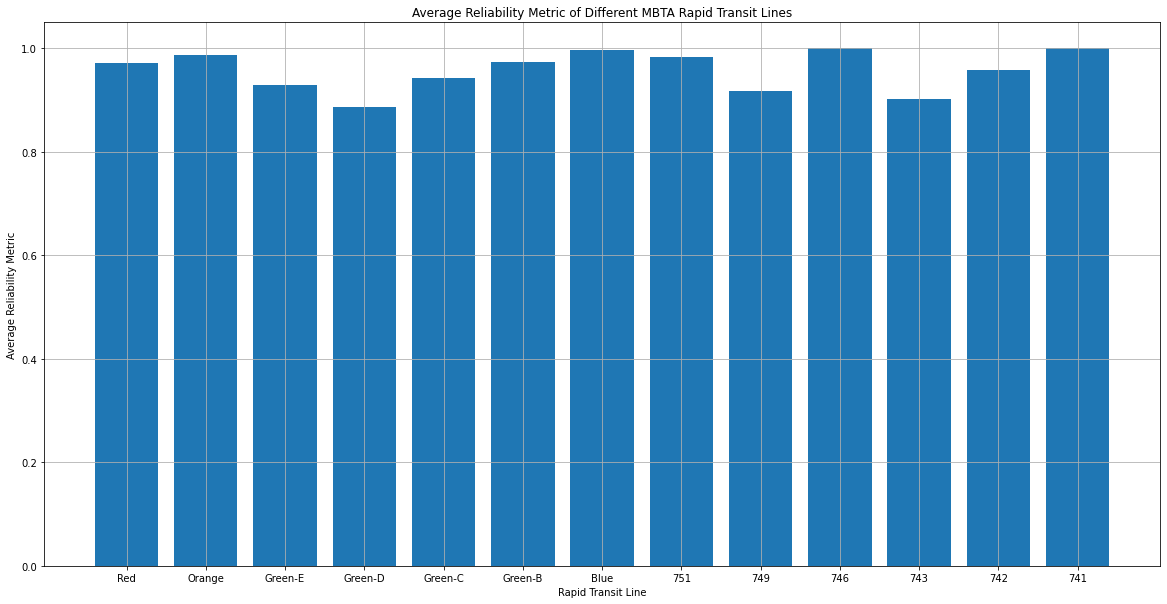

In [73]:
route=sub_df["gtfs_route_id"]
metric=sub_df["otp_reliability_metric"]
plt.figure(figsize=(20,10))
plt.bar(route, metric) #, color=['r', 'tab:orange', 'g', 'g', 'g', 'g', 'b', 'k', 'k', 'k', 'k', 'k', 'k']
plt.xlabel('Rapid Transit Line')
plt.ylabel('Average Reliability Metric')
plt.title('Average Reliability Metric of Different MBTA Rapid Transit Lines')
plt.grid()
plt.show()